# Import  all necessary library

In [141]:
import pandas as pd 
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [142]:
#import dataset
df = pd.read_csv('amazon.csv')

In [143]:
#show the data
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [144]:
df.Positive.value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

In [145]:
#let's see is there any nan value available or not
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [146]:
df = df.rename(columns = {'reviewText' : "taxt" , 'Positive' : 'target'} )

In [147]:
df.head()

,taxt,target
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [148]:
df.duplicated().sum()

0

<AxesSubplot: xlabel='target', ylabel='count'>

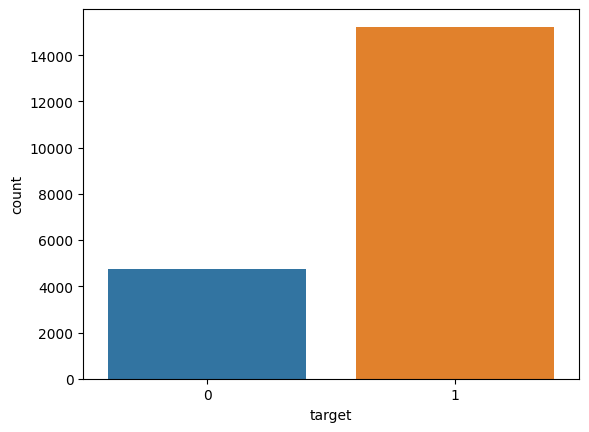

In [149]:
sns.countplot( x = df.target)

# Data Preprocessing

In [150]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
def Preprocessing(text):
    punctuation_remove = [char for char in text if char not in punctuation]
    join_word = ''.join(punctuation_remove)
    split_word = join_word.split()
    
    remove_stopword = [word for word in split_word if word.lower() not in stopwords.words('english')]
    add_to_sentence = ' '.join(remove_stopword)
    
    lemmatize_text =WordNetLemmatizer().lemmatize(add_to_sentence)
    return lemmatize_text

In [152]:
df['taxt'] = df['taxt'].apply(Preprocessing)

In [153]:
df[['taxt']].head()

,taxt
0,one best apps acording bunch people agree bomb...
1,pretty good version game free LOTS different l...
2,really cool game bunch levels find golden eggs...
3,silly game frustrating lots fun definitely rec...
4,terrific game pad Hrs fun grandkids love Great...


In [154]:
df.head()

,taxt,target
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free LOTS different l...,1
2,really cool game bunch levels find golden eggs...,1
3,silly game frustrating lots fun definitely rec...,1
4,terrific game pad Hrs fun grandkids love Great...,1


In [155]:
df['taxt']

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch levels find golden eggs...
3        silly game frustrating lots fun definitely rec...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbors Ginger1016 thanks bu...
19997    love game awesome wish free stuff houses didnt...
19998    love love love app side fashion story fights w...
19999    game rip list things MAKE BETTERbull First NEE...
Name: taxt, Length: 20000, dtype: object

In [156]:
df.head()

,taxt,target
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free LOTS different l...,1
2,really cool game bunch levels find golden eggs...,1
3,silly game frustrating lots fun definitely rec...,1
4,terrific game pad Hrs fun grandkids love Great...,1


In [157]:
df['taxt']

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch levels find golden eggs...
3        silly game frustrating lots fun definitely rec...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbors Ginger1016 thanks bu...
19997    love game awesome wish free stuff houses didnt...
19998    love love love app side fashion story fights w...
19999    game rip list things MAKE BETTERbull First NEE...
Name: taxt, Length: 20000, dtype: object

In [186]:
x  = TfidfVectorizer().fit_transform(df['taxt'])
y =  df['target']

In [187]:
x.shape

(20000, 23969)

In [188]:
y.shape

(20000,)

In [189]:
x

<20000x23969 sparse matrix of type '<class 'numpy.float64'>'
	with 313331 stored elements in Compressed Sparse Row format>

In [190]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    1
19997    1
19998    1
19999    0
Name: target, Length: 20000, dtype: int64

# imbalanced data handling 

In [191]:
over = RandomOverSampler(random_state=100)

In [192]:
new_x , new_y = over.fit_resample(x ,y)

In [193]:
new_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [194]:
new_x.shape , new_y.shape

((30466, 23969), (30466,))

# Model Selection

In [209]:
from sklearn.naive_bayes import BernoulliNB  , MultinomialNB
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [196]:
BernoulliNB = BernoulliNB()

In [197]:
MultinomialNB = MultinomialNB()

In [198]:
RandomForestClassifier = RandomForestClassifier()

In [199]:
ExtraTreesClassifier = ExtraTreesClassifier()

In [200]:
LogisticRegression = LogisticRegression()

In [210]:
SVC = SVC()

# Model Training

In [214]:
from sklearn.model_selection import cross_val_score , StratifiedKFold ,cross_val_predict

In [202]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

In [203]:
cross_val_score(estimator=BernoulliNB , cv = cv , X =new_x  , y = new_y)

array([0.90613718, 0.90776301, 0.91449204, 0.9120302 , 0.91137371])

In [204]:
cross_val_score(estimator=MultinomialNB , cv = cv ,X =new_x  , y = new_y)

array([0.89973745, 0.89807976, 0.90694239, 0.90530117, 0.90645002])

In [205]:
cross_val_score(estimator=RandomForestClassifier , cv = cv ,X =new_x  , y = new_y)

array([0.95454545, 0.95470212, 0.9502708 , 0.95371738, 0.95207615])

In [206]:
cross_val_score(estimator=ExtraTreesClassifier , cv = cv , X =new_x  , y = new_y)

array([0.96914998, 0.96980141, 0.96454948, 0.9668472 , 0.96717545])

In [207]:
cross_val_score(estimator=LogisticRegression , cv = cv , X =new_x  , y = new_y)

array([0.9174598 , 0.90825538, 0.91367143, 0.91301494, 0.91662564])

In [211]:
cross_val_score(estimator=SVC , cv = cv , X =new_x  , y = new_y)

array([0.96094519, 0.96340062, 0.96061054, 0.96028229, 0.95798457])

In [212]:
#ExtraTreesClassifier and SVC are the best 

# Formal Evaluation

In [219]:
model = LogisticRegression()

# Using cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(estimator=model, X=new_x, y=new_y, cv=5)  # You can change cv to the desired number of folds

# Calculating the confusion matrix
conf_matrix = confusion_matrix(new_y, y_pred)

print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[14328   905]
 [ 2136 13097]]


In [220]:
model = BernoulliNB()
# Using cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(estimator=model, X=new_x, y=new_y, cv=5)  # You can change cv to the desired number of folds

# Calculating the confusion matrix
conf_matrix = confusion_matrix(new_y, y_pred)

print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[14286   947]
 [ 2515 12718]]


In [221]:
model = MultinomialNB()
# Using cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(estimator=model, X=new_x, y=new_y, cv=5)  # You can change cv to the desired number of folds

# Calculating the confusion matrix
conf_matrix = confusion_matrix(new_y, y_pred)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[14205  1028]
 [ 2734 12499]]


In [224]:
model = ExtraTreesClassifier()
# Using cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(estimator=model, X=new_x, y=new_y, cv=5)  # You can change cv to the desired number of folds

# Calculating the confusion matrix
conf_matrix = confusion_matrix(new_y, y_pred)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[15034   199]
 [  780 14453]]


<AxesSubplot: >

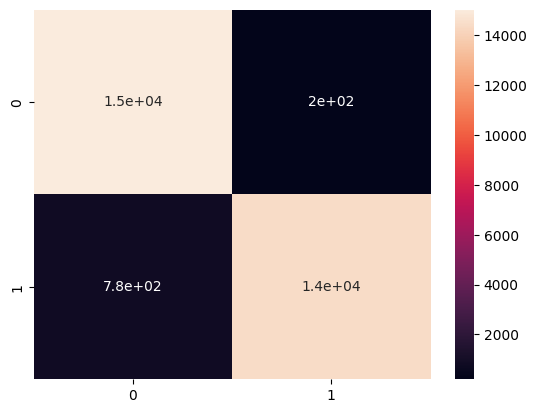

In [227]:
sns.heatmap(conf_matrix , annot=True)

# Comments

ExtraTreesClassifier is the best model they give the best accuracy and also true Positive and true Nagitive prediction are too high aslo false Nagitive and false postitive too low 